In [10]:
%matplotlib inline


# Demo of DBSCAN clustering algorithm

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) finds core
samples in regions of high density and expands clusters from them. This
algorithm is good for data which contains clusters of similar density.

## Data generation

We use `sklearn.datasets.make_blobs` to create 3 synthetic clusters.

In [13]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Choose three centers for the blobs we're going to generate
centers = [[1, 1], [-1, -1], [1, -1]]
# Generate 750 total random points, around the centers, with a given standard deviation 0.4
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)
# Normalize the data
X = StandardScaler().fit_transform(X)
# Uncomment the following line and press shift+enter to learn more about this normalization
# StandardScaler?

We can visualize the resulting data:



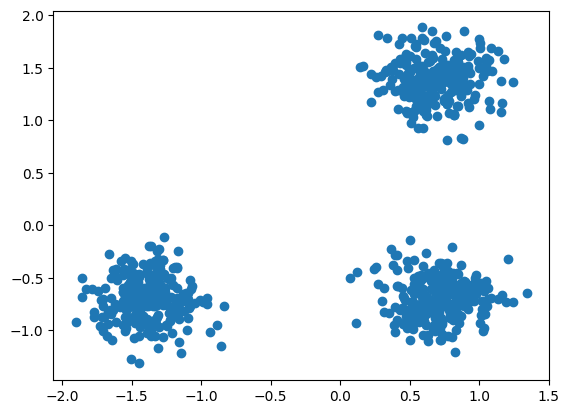

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Compute DBSCAN

Now we'll run a DBSCAN on the artifical points we generated in the previous part.

How many clusters should we expect the algorithm to find?

Fill in the blanks (`???`) of the following cell.

In [3]:
import numpy as np
from sklearn.cluster import DBSCAN # The clustering algorithm
from sklearn import metrics

# Step 1. Initialize the clustering algorithm DBSCAN and set the parameters `eps=0.3` and `min_samples=10`.
db = DBSCAN(eps=0.3, min_samples=10)

# Perform the clustering. To do this, use the `.fit()` function of `db`
# and pass in the dataset X constructed in part 1
db.fit(X)

# We can access the labels that the clustering inferred for the points.
# This will be an array of the same size as X.
labels = db.labels_
# labels[0] will be the inferred label of X[0], and so on.

# The presence of a label `-1` indicates that there were points that the clustering couldn't classify.
# These are called 'noise'.

# Count the number of inferred classes.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# Count the 'noise' points that couldn't be classified.
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


Clustering algorithms are fundamentally unsupervised learning methods.
However, since `make_blobs` gives access to the true
labels of the synthetic clusters, it is possible to use evaluation metrics
that leverage this "supervised" ground truth information to quantify the
quality of the resulting clusters. Examples of such metrics are the
homogeneity, completeness, V-measure, Rand-Index, Adjusted Rand-Index and
Adjusted Mutual Information (AMI).

If the ground truth labels are not known, evaluation can only be performed
using the model results itself. In that case, the Silhouette Coefficient comes
in handy as a metric for evaluating the result of an unsupervised learning technique.



In [4]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


## Plot results

Core samples (large dots) and non-core samples (small dots) are color-coded
according to the asigned cluster. Samples tagged as noise are represented in
black.

Formally, what is a core point? (following https://en.wikipedia.org/wiki/DBSCAN#Preliminary)
Intuitively, what is a core point and what is a non-core point?

Run the following cell to visualize which points in the generated dataset are core points, which are non-core points, and which are noise points.

In [5]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

NameError: name 'plt' is not defined